## 6.1
### completed in the vm

## 6.2
### Using 5.2 as a guide in Deep Learning with Python

In [13]:
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [14]:
print('X_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [15]:
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255
x_val_train = x_train[:10000]
x_train = x_train[10000:]
#Convert target data to single array of shape (50000,) and (10000,)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
y_val_train = y_train[:10000]
y_train = y_train[10000:]

In [16]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, Flatten
model = models.Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='same', 
                 input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [18]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs = 100, 
                    validation_data=(x_val_train, y_val_train), 
                    verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 1.1452 - acc: 0.6801
[1.1451843976974487, 0.6801000237464905]


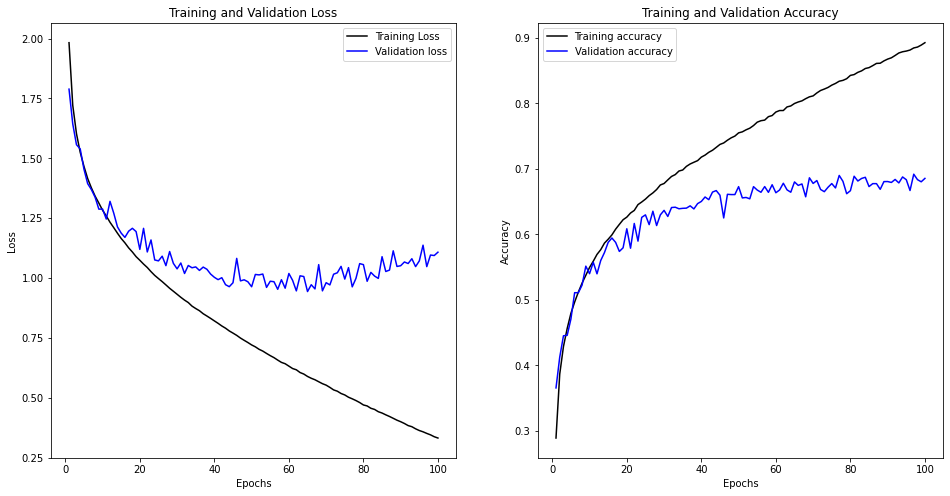

In [20]:
import matplotlib.pyplot as plt

results = model.evaluate(x_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'k', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'k', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()

### 6.2.B

In [24]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)       

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [27]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, 
                                 y_train,
                                 batch_size=128),
                    epochs=100,
                    validation_data=(x_val_train, y_val_train),
                    workers=4, 
                    verbose=False)

313/313 [==============================] - 1s 3ms/step - loss: 1.0191 - acc: 0.6462
[1.019115924835205, 0.6462000012397766]


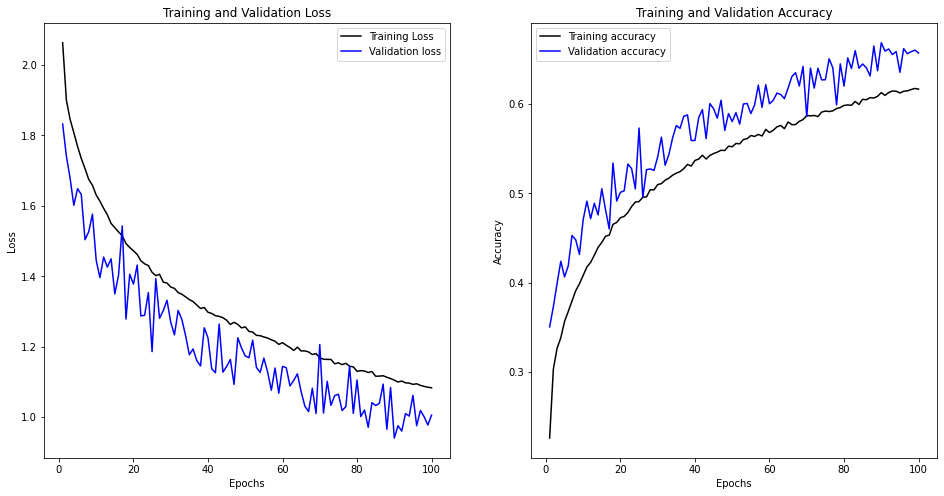

In [28]:
results = model.evaluate(x_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'k', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'k', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()

## 6.3

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path
import os

model = ResNet50(weights='imagenet')

def process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return(img)

def predict_image(processed_img):
    preds = model.predict(processed_img)
    prediction = decode_predictions(preds, top=1)[0][0]
    _, description, probability = prediction
    return description, probability

In [32]:

import pandas as pd
from IPython.display import Image

current_dir = Path(os.getcwd()).absolute()
images_dir = current_dir.joinpath('images')

for root, dirs, pictures in os.walk(images_dir):
    for picture in pictures:
        image_path = Path(root).joinpath(picture)
        img = process_image(image_path)
        description, probability = predict_image(img)
        pic = mpimg.imread(image_path)
        plt.imshow(pic)
        plt.title(f'{picture}\nPrediction: {description:^}\nProbability: {probability:.3f}')
        plt.show()